👋 **Приветствую, Андрей!** 

✨ Вот ты и дошел до финального проекта, поздравляю!

Вспомни, какие задачи ты решал в начале обучения, писал первые циклы и вот ты уже делаешь большую работу, приближенную к реальным условиям. Я думаю это заслуживает похвалы =)

Меня зовут Арсен Абдулин, и я буду твоим ревьювером по проекту. Предлагаю общаться на «ты», если не против =) Моя цель — не поиск ошибок в твоей работе, а поделиться опытом и помочь успешно завершить проект.

Видно, что ты проделал большую работу — у меня сложилось положительное впечатление 😊 Ты получил необходимый результат, но есть несколько замечаний и рекомендаций. 

При проверке работ я делаю следующие комментарии:

<div class="alert alert-success">
<b>✔️ Зеленым цветом</b> отмечены удачные решения.</div>

<div class="alert alert-warning">
<b>⚠️ Желтым цветом</b> я отметил пункты, которые в следующий раз можно сделать по-другому. Одно-два таких замечания в проекте допускается, но если их много — проект следует доработать. </div>

<div class="alert alert-danger">
<b>🚫 Красным цветом</b> отмечены критические замечания, которые необходимо поправить, чтобы принять проект. </div>

Если какие-то моменты в задании для тебя были непонятны и у тебя есть ко мне вопросы — смело спрашивай 😊 Также ты можешь доработать места, где есть желтые комментарии в этом проекте (однако, это не обязательно).

Предлагаю работать над проектом в диалоге: если ты решишь что-то поменять по моим рекомендациям — пиши об этом (выбери для своих комментариев определенный цвет - так мне будет легче увидеть изменения). Пожалуйста не перемещай, не изменяй и не удаляй мои комментарии. Все это поможет сделать проверку твоего проекта оперативнее.

<div class="alert alert-info"> <b>ℹ️ Комментарий студента: </b> Пример комментария. </div>

### Описание проекта

# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

 Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

Данные

[final_provider.zip](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/ac39c23b-718e-4cd6-bdaa-85b3a127a457/final_provider.zip)

Данные также находятся в тренажёре, в папке `/datasets/final_provider/`.

### План работы
- Изучение задачи.
- Изучение полученных данных.
- Подготовка данных к анализу.
- Анализ данных.
- Подготовка данных к анализу модели. (Определение признаков и цели, разбиение на выборки, кодирование категориальных переменных, борьба с дисбалансом данных, удаление не влияющих на результат признаков)
- Анализ моделей (определение исследуемых моделей, подбор гиперпараметров, оценка эффективности моделей)
- Тестирование наилучшей модели. 
- Вывод.
- Отчет.

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Хорошо, что добавил описание проекта и план работы! Так постороннему человеку будет проще разобраться.
    
</div>

### Импорт библиотек

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, classification_report

from sklearn.feature_selection import f_classif, mutual_info_classif

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Необходимые библиотеки импортированы, ничего лишнего.
    
</div>

### Обзор данных

In [63]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')
data = [contract, personal, internet, phone]

In [64]:
for i in data:
    display(i.info())
    display(i.head(5))
    print('Количество пропусков ', i.isna().sum(), sep='\n')
    print('Количество дубликатов ', i.duplicated().sum(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Количество пропусков 
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
Количество дубликатов 
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Количество пропусков 
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
Количество дубликатов 
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Количество пропусков 
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
Количество дубликатов 
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Количество пропусков 
customerID       0
MultipleLines    0
dtype: int64
Количество дубликатов 
0


<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Данные успешно загружены! Хорошо, что проверил пропуски и дубликаты.
    
</div>

#### Вывод + описание данных

Для проекта предоставленно 4 датасета дубликатов и пропусков нет.
- 2 таблицы имеют 7043 строки это таблицы с данными о контракте и персональными данными клиентов.
- 2 содержат информацию о том какими услугами пользуются клиенты компании. эти таблицы содержат меньшее количество строк. соответственно можно сделать вывод не все клиенты приобрели и услуги телефонии и услуги интернет.
- Для проведения анализа необходимо объеденить все таблицы в один датасет.

Для удобства приведу описание данных в таблицах.

contract
- customerID - идентификационный номер клиента
- BeginDate - дата начала пользования услугами 
- EndDate - дата окончания пользования услугами
- Type - тип оплаты: ежемесячно, раз в год или раз год
- PaperlessBilling - электронный счет(возможно имеется ввиду оплата через личный кабинет)
- PaymentMethod - способ оплаты
- MonthlyCharges - сумма ежемесячного платёжа 
- TotalCharges - сумма всех платежей

personal
- customerID - идентификационный номер клиента
- gender - пол клиента
- SeniorCitizen - является ли клиент пожилым (возможно имеется ввиду пенсионер)
- Partner - возможно имеется ввиду семейное положение, но тогда необходимо назвать столбец married
- Dependents - есть ли у клиента еждевенцы

internet
- customerID - идентификационный номер клиента
- Internet Service - тип подключения
- Online Security -  безопасность
- Online Backup - резервное копирование
- Device Protection - защита устройств
- Tech Support - линия технической поддержки
- Streaming TV - Стриминговое телевидение  каталог фильмов
- Streaming Movies - каталог фильмов

phone
- customerID - идентификационный номер клиента
- Multiple Lines - возможность использовать несколько телефонный линий одновременно(колцентр)


<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Здорово, что добавил обозначения признаков в датасетах!
    
</div>

### Предобработка данных

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Желательно комментарии к действиям по ходу проекта писать в ячейках Markdown.
    
</div>

#### Объединение таблиц

In [65]:
#для того что бы в будущем можно было выделидь пользователей только телефоном добавил столбец
phone['phone'] = 'Yes'
# с таблицей internet поступлю аналогично
internet.insert(1,'internet', 'Yes')     #internet['internet'] = 'Yes'


In [66]:
# Объединение таблиц

all_data = personal.merge(phone, how ='outer', on='customerID').merge(internet,how ='outer', on='customerID').merge(contract,how ='outer', on='customerID')

#display(all_data.head(45))


#### Заполнение пропусков

In [67]:
#проверка на пропуски
print('Количество пропусков ', all_data.isna().sum(), sep='\n')

Количество пропусков 
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
phone                682
internet            1526
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
dtype: int64


Как и говорил выше пропуски связаны с тем, что клиенты пользуются не всеми услугами. Поэтому пропуски заменю на No (что означает не исползуется)

In [68]:
# заполнение пропусков
all_data = all_data.fillna('No')
#print('Количество пропусков ', all_data.isna().sum(), sep='\n')

#### Добавление целевого признака

In [69]:
#добавление целевого признака по столбцу EndDate: если leave = 1 то клиент  ушел, если leave = 0 то клиент активен.
all_data['leave'] = 1
all_data.loc[all_data['EndDate'] == 'No', 'leave'] = 0
#all_data

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Объединение таблиц выполнено успешно, пропуски заполнены, добавлен новый признак!
    
</div>

### Анализ данных

####  Сравнение распределения величин ежемесячных платежей

#####  Распределение величин ежемесячных платежей всех клиентов

In [70]:
all_data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

#####  Распределение величин ежемесячных платежей ушедших клиентов

In [71]:
all_data.query('leave == 1')['MonthlyCharges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

#####  Распределение величин ежемесячных платежей действующих клиентов

In [72]:
all_data.query('leave == 0')['MonthlyCharges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

#####  Гистограмма распределения ежемесячных платежей

'Гистограмма распределения ежемесячного платежа'

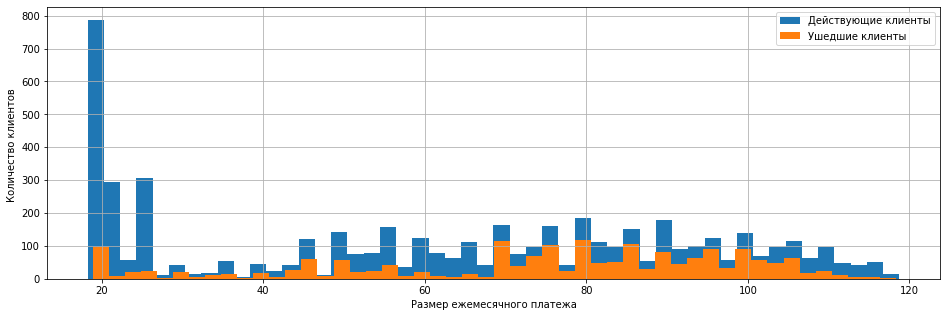

In [73]:
all_data.query('leave == 0')['MonthlyCharges'].hist(bins=50,grid=True, figsize=(16,5), label='Действующие клиенты')

all_data.query('leave == 1')['MonthlyCharges'].hist(bins=50,grid=True, figsize=(16,5), label='Ушедшие клиенты')
plt.xlabel('Размер ежемесячного платежа')
plt.ylabel('Количество клиентов ')
plt.legend()
plt.title;('Гистограмма распределения ежемесячного платежа')



<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Интересное замечание! Значительную долю оттока составили клиенты, которые тратили выше среднего.
    
</div>

##### Вывод 
Сравнение распределения величин ежемесячных платежей показало, что у ушедших пользователей показатели среднего, минимального и максимальнго значения а также медиана и величины 25%- и 75%-квартилей намного ВЫШЕ чем у действующих пользователей.

Например:

- среднее 74 к 61
- медиана 79 к 64
- 25%-квартиль 56 к 25
- 75%-квартиль 94 к 88

Можно предположить, что клиенты ушли из - за высокой ежемесячной платы. Возможно если бы им были предложены лучшие условия они бы остались


#### Сравнение поведения клиентов разных групп

#####  Доля использования интернета(действующие клиенты)

Доля использования интернета(действующие клиенты) 
Yes    0.726904
No     0.273096
Name: internet, dtype: float64


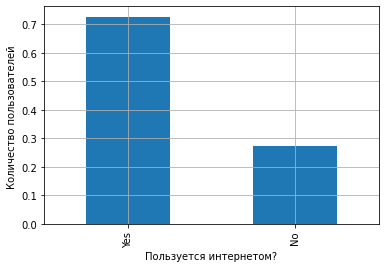

In [74]:
all_data.query('leave == 0')['internet'].value_counts(normalize = (0,1)).plot(kind = 'bar', grid = True)
plt.xlabel('Пользуется интернетом?')
plt.ylabel('Количество пользователей ')
plt.title;('График распределения доли действующих пользователей интернетом ')

print('Доля использования интернета(действующие клиенты) ', all_data.query('leave == 0')['internet'].value_counts(normalize = (0,1)), sep='\n')

##### Доля использования интернета(ушедшие клиенты)

Доля использования интернета(ушедшие клиенты) 
Yes    0.93954
No     0.06046
Name: internet, dtype: float64


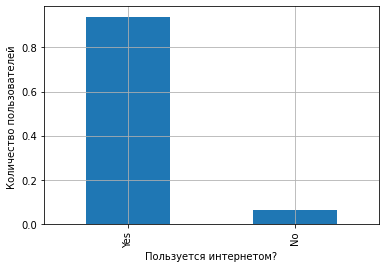

In [75]:
all_data.query('leave == 1')['internet'].value_counts(normalize = (0,1)).plot(kind = 'bar', grid = True)
plt.xlabel('Пользуется интернетом?')
plt.ylabel('Количество пользователей ')
plt.title;('График распределения доли ушедших пользователей интернетом ')

print('Доля использования интернета(ушедшие клиенты) ', all_data.query('leave == 1')['internet'].value_counts(normalize = (0,1)), sep='\n')

#####  Доля использования телефонии(действующие клиенты)

Доля использования телефонии (действующие клиенты) 
Yes    0.901044
No     0.098956
Name: phone, dtype: float64


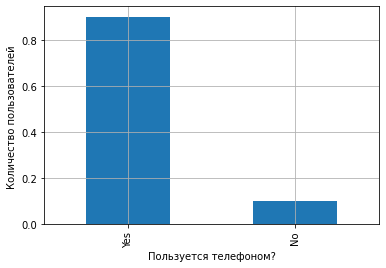

In [76]:
all_data.query('leave == 0')['phone'].value_counts(normalize = (0,1)).plot(kind = 'bar', grid = True)
plt.xlabel('Пользуется телефоном?')
plt.ylabel('Количество пользователей ')
plt.title;('График распределения доли действующих пользователей интернетом ')

print('Доля использования телефонии (действующие клиенты) ', all_data.query('leave == 0')['phone'].value_counts(normalize = (0,1)), sep='\n')

#####  Доля использования телефонии(ушедшие клиенты)

Доля использования телефонии (ушедшие клиенты) 
Yes    0.909042
No     0.090958
Name: phone, dtype: float64


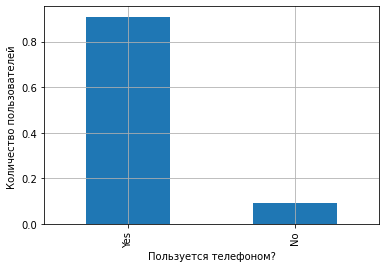

In [77]:
all_data.query('leave == 1')['phone'].value_counts(normalize = (0,1)).plot(kind = 'bar', grid = True)
plt.xlabel('Пользуется телефоном?')
plt.ylabel('Количество пользователей ')
plt.title;('График распределения доли ушедших пользователей интернетом ')

print('Доля использования телефонии (ушедшие клиенты) ', all_data.query('leave == 1')['phone'].value_counts(normalize = (0,1)), sep='\n')

##### Вывод
Доля использования интернета среди ушедших клиентов равна 93%

Доля использования телефона среди ушедших клиентов равна 90%

Из чего можно сделать вывод, что используемая услуга не влияет на уход клиентов т.к. значительное большинство клиентов пользовались одновременно обоими услугами.

Так же можно заметить, что доля использования интернета среди действующих клиентов равна 30%, что говорит о том что менеджерам компании есть к чему стремиться

#### Анализ зависимости признаков от целевого признака

In [78]:
#plt.figure(figsize=(10,6))
#ax = sns.barplot(x="MonthlyCharges", y="PaymentMethod", hue="leave",  data=all_data)
#plt.title("Распределение общей суммы платежей по услугам  (0- все сервисы, 1 - только интернет, 2- только телефон)")
#plt.show()

##### Гистограмма распределения метода платежа

'Гистограмма распределения по методу платежа'

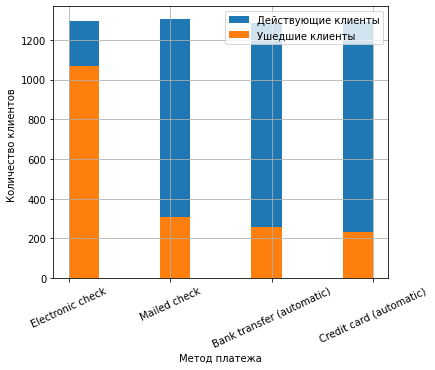

In [79]:
#Проверю есть ли зависимость ухода клиентов в зависимости от метода платежа
all_data.query('leave == 0')['PaymentMethod'].hist(grid=True, figsize=(6,5), label='Действующие клиенты')
all_data.query('leave == 1')['PaymentMethod'].hist(grid=True, figsize=(6,5), label='Ушедшие клиенты')
plt.xlabel('Метод платежа')
plt.ylabel('Количество клиентов ')
plt.legend()
plt.xticks(rotation = 25)
plt.title;('Гистограмма распределения по методу платежа')

##### Гистограмма распределения по гендерному признаку

'Гистограмма распределения по гендерному признаку'

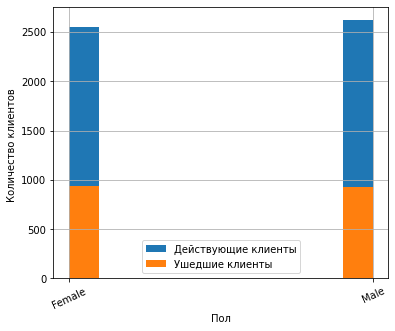

In [80]:
all_data.query('leave == 0')['gender'].hist(grid=True, figsize=(6,5), label='Действующие клиенты')
all_data.query('leave == 1')['gender'].hist(grid=True, figsize=(6,5), label='Ушедшие клиенты')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов ')
plt.legend()
plt.xticks(rotation = 25)
plt.title;('Гистограмма распределения по гендерному признаку')

##### Гистограмма распределения по возрастному признаку

'Гистограмма распределения по возрастному признаку'

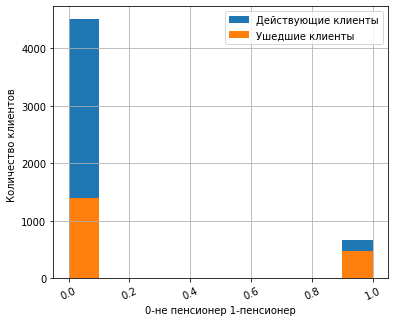

In [81]:
all_data.query('leave == 0')['SeniorCitizen'].hist(grid=True, figsize=(6,5), label='Действующие клиенты')
all_data.query('leave == 1')['SeniorCitizen'].hist(grid=True, figsize=(6,5), label='Ушедшие клиенты')
plt.xlabel('0-не пенсионер 1-пенсионер')
plt.ylabel('Количество клиентов ')
plt.legend()
plt.xticks(rotation = 25)
plt.title;('Гистограмма распределения по возрастному признаку')

##### Гистограмма распределения по семейному положению

'Гистограмма распределения по семейному положению'

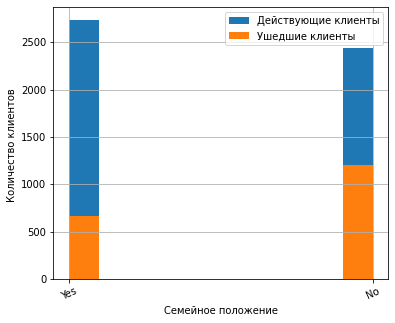

In [82]:
all_data.query('leave == 0')['Partner'].hist(grid=True, figsize=(6,5), label='Действующие клиенты')
all_data.query('leave == 1')['Partner'].hist(grid=True, figsize=(6,5), label='Ушедшие клиенты')
plt.xlabel('Семейное положение')
plt.ylabel('Количество клиентов ')
plt.legend()
plt.xticks(rotation = 25)
plt.title;('Гистограмма распределения по семейному положению')

##### Гистограмма распределения по наличию еждевенцев

'Гистограмма распределения по наличию еждевенцев'

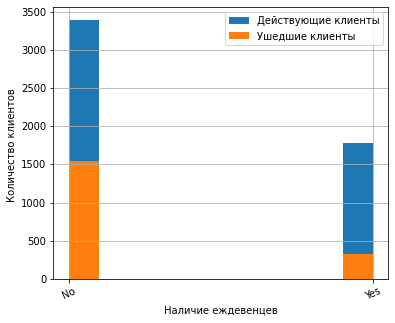

In [83]:
all_data.query('leave == 0')['Dependents'].hist(grid=True, figsize=(6,5), label='Действующие клиенты')
all_data.query('leave == 1')['Dependents'].hist(grid=True, figsize=(6,5), label='Ушедшие клиенты')
plt.xlabel('Наличие еждевенцев')
plt.ylabel('Количество клиентов ')
plt.legend()
plt.xticks(rotation = 25)
plt.title;('Гистограмма распределения по наличию еждевенцев')

'Гистограмма распределения по типу платежа'

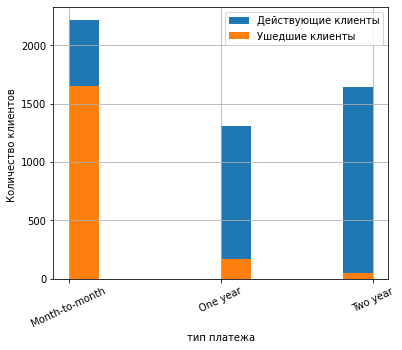

In [84]:
all_data.query('leave == 0')['Type'].hist(grid=True, figsize=(6,5), label='Действующие клиенты')
all_data.query('leave == 1')['Type'].hist(grid=True, figsize=(6,5), label='Ушедшие клиенты')
plt.xlabel('тип платежа')
plt.ylabel('Количество клиентов ')
plt.legend()
plt.xticks(rotation = 25)
plt.title;('Гистограмма распределения по типу платежа')

In [85]:
all_data.query('leave == 0')['Type'].value_counts(normalize = (0,1))

Month-to-month    0.429068
Two year          0.318322
One year          0.252609
Name: Type, dtype: float64

In [86]:
all_data.query('leave == 1')['Type'].value_counts(normalize = (0,1))

Month-to-month    0.885500
One year          0.088818
Two year          0.025682
Name: Type, dtype: float64

##### Вывод

Анализирую Гистограмму распределения по методу платежа можно сделать вывод, что среди клиентов используюших электронный метов оплаты большая часть ушедших клиентов. Возможно у компании не удобный интерфейс оплаты и над ним нужно поработать. Возможно клиенты не оплачивают услуги заранее, а например как я вспоминаю об оплате когда интернет отключился и соответственно если нет интернета я не могу провести онлайн платеж и это реально раздражает(так с горяча я поменял не одного провайдера).
В таком случае компании стоит расмотреть инструмент информирования клиентов о сроке очередного платежа за условные 3-5 дней. Или предусмотреть техническую возможность для проведения платежа при отключенной услуге.


Гистограмма распределения по гендерному признаку показала, что пол клиента ни как не влияет на отток.

Гистограмма распределения по семейному положению показала, что при наличие партнера клиенты реже уходят чем холостые.

Гистограмма распределения по наличию еждевенцев показала, что при отсутствии еждевенца клиенты чаще покидают компанию.

Гистограмма распределения по типу платежа показала, что 90% доля ушедших клиентов приходится на ежемесячный тип платежа. 
Тут сотрудникам компании нужно серьезно задуматься как угодоворить клиентов перейти на более длительные подписки.
Возможно компании необходимо продумать программу предоставления скидок с целью мотивации клиентов для приобретения долгосрочных подписок. 
Так же необходимо попробовать связать ежемесячный платеж с електронным типом платежа.

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Очень понравился твой анализ данных! Все понятно и очень подробно.
    
Нужно только помнить, что влияние различных факторов на целевую переменную, это гипотеза, и нужно использовать методы проверки гипотез. Но это уже отдельная работа =)
    
</div>

### Подготовка данных

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Здесь настоятельно рекомендую использовать кодирование One-hot-encoding. Ты конечно сделал все правильно, но это лишняя работа и легко запутаться.
    
Нужно стремиться использовать известные методы.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента:</b> Ячейку с кодом закоментил. 
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Хорошо!
    
</div>

In [87]:
#all_data['gender'] = pd.Series(np.where(all_data['gender'].values == 'Female', 1, 0),all_data.index)
#all_data['Partner'] = pd.Series(np.where(all_data['Partner'].values == 'Yes', 1, 0),all_data.index)
#all_data['Dependents'] = pd.Series(np.where(all_data['Dependents'].values == 'Yes', 1, 0),all_data.index)
#all_data['MultipleLines'] = pd.Series(np.where(all_data['MultipleLines'].values == 'Yes', 1, 0),all_data.index)
#all_data['phone'] = pd.Series(np.where(all_data['phone'].values == 'Yes',1,0),all_data.index)
#all_data['internet'] = pd.Series(np.where(all_data['internet'].values == 'Yes',1,0),all_data.index)
#all_data['OnlineSecurity'] = pd.Series(np.where(all_data['OnlineSecurity'].values == 'Yes', 1, 0),all_data.index)
#all_data['StreamingTV'] = pd.Series(np.where(all_data['StreamingTV'].values == 'Yes', 1, 0),all_data.index)
#all_data['StreamingMovies'] = pd.Series(np.where(all_data['StreamingMovies'].values == 'Yes', 1, 0),all_data.index)
#all_data['PaperlessBilling'] = pd.Series(np.where(all_data['PaperlessBilling'].values == 'Yes',1,0),all_data.index)
#all_data['OnlineBackup'] = pd.Series(np.where(all_data['OnlineBackup'].values == 'Yes', 1, 0),all_data.index)
#all_data['DeviceProtection'] = pd.Series(np.where(all_data['DeviceProtection'].values == 'Yes', 1, 0),all_data.index)
#all_data['TechSupport'] = pd.Series(np.where(all_data['TechSupport'].values == 'Yes', 1, 0),all_data.index)



<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Увидел ниже, что ты используешь OHE кодирование, в таком случае ячейка выше не нужна.
    
</div>

#### Создание доп признака "время пользования сервисом"

In [88]:
#форматирую столбцы с датой
all_data['EndDate']= all_data['EndDate'].replace('No', '2020-02-01')
all_data['BeginDate']= pd.to_datetime(all_data['BeginDate'], format='%Y-%m-%d')
all_data['EndDate']= pd.to_datetime(all_data['EndDate'], format='%Y-%m-%dT%H:%M:%S',errors='coerce')

# создаю столбцы для вычисления
#all_data['begin_year'] = pd.DatetimeIndex(all_data['BeginDate']).year
#all_data['end_year'] = pd.DatetimeIndex(all_data['EndDate']).year
#all_data['begin_month'] = pd.DatetimeIndex(all_data['BeginDate']).month
#all_data['end_month'] = pd.DatetimeIndex(all_data['EndDate']).month

#добавляю признак время пользования сервисом в месяцах
#all_data['num_of_months'] = ((all_data['end_year']- all_data['begin_year']) * 12 + (all_data['end_month'] - all_data['begin_month']))

# удаляю столбцы для расчетов и столбцы с датой так же по твоей рекомендации удалю столбец customer ID
#all_data = all_data.drop(['begin_year','end_year','begin_month','end_month','BeginDate','EndDate','customerID'], axis=1)

#c_df['IntTime'] = (c_df['EndDate'] - c_df['BeginDate']).dt.days
#c_df.head()

In [89]:
all_data['total_days'] = (all_data['EndDate'] - all_data['BeginDate']).dt.days
all_data = all_data.drop(['BeginDate','EndDate','customerID'], axis=1)
#all_data.head(5)

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера (v3):</b> Да, код можно упростить. Тебе по сути не нужны колонки отдельно с годами и месяцами. Например, можно сразу посчитать количество дней:
        
    all_data['total_days'] = (all_data['EndDate'] - all_data['BeginDate']).dt.days

</div>

#### Оценка важности категориальных признаков

<div class="alert alert-danger">
<b>🚫 Комментарий ревьювера (v2):</b> В ячейке ниже опечатка. Ты пропустил all_data_ohe['leave'].
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента 2:</b> Странно что код паботал. Опечатку исправил, спасибо! 
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v3):</b> Хорошо!
    
</div>

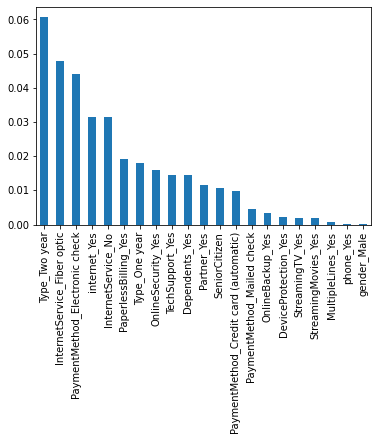

In [91]:
#Создаю доп датасет(что бы не запутаться) и удаляю из него количественные переменные
all_data1 = all_data.drop(['MonthlyCharges','TotalCharges','total_days'], axis=1)
#ОНЕ кодировка
all_data_ohe1 = pd.get_dummies(all_data1, drop_first = True)
# строю бар плот
cat_barplot = pd.Series(mutual_info_classif(all_data_ohe1.drop(['leave'], axis = 1), all_data_ohe1['leave'],
                                        discrete_features=True), index=all_data_ohe1.drop(['leave'], axis = 1).columns)
cat_barplot.sort_values(inplace=True, ascending=False)
cat_barplot.plot(kind="bar");

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Хорошо, что попробовал данный способ для отбора признаков.
    
</div>

Из графика видно, что признаки после PaymentMethod_mailed не оказываю влияния на таргет. в связи с чем считаю целесообразным их удалить

In [92]:
all_data = all_data.drop(['gender','phone','MultipleLines','StreamingMovies','StreamingTV','DeviceProtection','OnlineBackup'], axis=1)

#### ОНЕ кодирование

<div class="alert alert-danger">
<b>🚫 Комментарий ревьювера (v2):</b> К сожалению OHE кодирование выполнена неверно :(
    
Советую обращать внимание на количество получившихся столбцов, здесь очень большая матрица, как можно увидеть ниже.
    
Все потому, что функция get_dummies кодирует колонки, в которых тип данных category, object.
    
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
    
У тебя закодировалась колонка TotalCharges, которая поидее должна иметь числовой тип данных. Поправь пожалуйста.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента 2:</b> Все исправил, большое спасибо за подсказку! 
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v3):</b> Теперь все правильно!
    
</div>

In [93]:
# преобразую столбец TotalCharges в float что бы избежать его кодирования
all_data['TotalCharges'] = all_data['TotalCharges'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
# удаляю пропуски
all_data.dropna(subset=['TotalCharges'], inplace=True)
#all_data.isna().sum()


In [94]:

#Создадаю датафрейм методом прямого кодирования с защитой от дамми-ловушки.
all_data_ohe = pd.get_dummies(all_data, drop_first = True)
#all_data_ohe.info()

<div class="alert alert-danger">
<b>🚫 Комментарий ревьювера:</b> У тебя остался столбец id и он был закодирован. Нужно удалить данный столбец перед кодированием признаков.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента:</b> Столбец с ID клиента удалил
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Хорошо, что удалил id. 
    
</div>

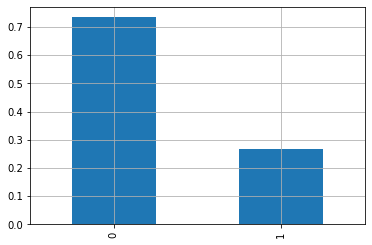

Баланс классов 
0    0.734215
1    0.265785
Name: leave, dtype: float64


In [95]:
# Изучу баланс классов
all_data_ohe['leave'].value_counts(normalize = (0,1)).plot(kind = 'bar', grid = True)
plt.show()
print('Баланс классов ', all_data_ohe['leave'].value_counts(normalize = (0,1)), sep='\n')

Имеется дисбаланс целевого признака. Далее буду с ним бороться. Попробую несколько вариантов.

#### Разделение на выборки

In [96]:
# Определяю признаки и цель
features = all_data_ohe.drop(['leave'], axis = 1)
target = all_data_ohe['leave']

# Выполняю разделение выборки на обучающу валидационную и тестовую в пропорции 60:20:20
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, 
                                                                              random_state=12345 )
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(4219, 17) (1406, 17) (1407, 17)
(4219,) (1406,) (1407,)


<div class="alert alert-danger">
<b>🚫 Комментарий ревьювера:</b> Есть важный момент в выборе признаков для обучения. Поскольку у нас проект не временные ряды, то факторы, связанные с датой и временем нужно удалить. Иначе метрика сильно вырастет и модель переобучится. А на реальных данных результаты будут неправильные.
    
Но можно посчитать время, пока клиент пользовался сервисом (например в днях или месяцах). Вот этот фактор будет хорошо влиять на предсказания.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента:</b> Благодарю за подсказку. Я чувствовал, что что-то не так, но не мог понять в чем дело.
    Все исправил. Код перед кодированием ОНЕ. Код для вычисления получился громоздким, может быть есть способ поизящнее?
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Ты про какой код, который для обучения моделей и предсказаний?
    
Например, можно сделать функцию, куда будут передаваться нужная модель и гиперпараметры.
    
А в самой функции написать GridSearch и вывод лучших параметров.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента 2:</b> Про то как достать количество месяцев.
    
</div>

### Иследование задачи

In [97]:
def line():
    print('______________________________________________')

#### DecisionTreeClassifier

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Желательно исходить от параметров по умолчанию в модели, чтобы не перебирать лишние значения.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента:</b> Исправил
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Хорошо.
    
</div>

In [114]:
#regressor = DecisionTreeClassifier(class_weight='balanced',random_state=12345) 
#hyperparams = [{'max_depth':range(1,160,5)}]

#print('# Подбор гиперпараметров для получения лучшей метрики')
#line()
#clf = GridSearchCV(regressor, hyperparams, scoring='roc_auc')
#clf.fit(features_train, target_train)
#print("Лучший лучший показатель получается при следуюших параметрах:")
#print(clf.best_params_)
#line()
#print("Лучший roc_auc_score:")
#print(clf.best_score_)
#line()
#predictions = clf.predict(features_test)
#print(classification_report(target_test, predictions))


Лучший лучший показатель получается при следуюших параметрах:
{'max_depth': 6}
______________________________________________
Лучший roc_auc_score:
0.8392889906181782
______________________________________________


#### LogisticRegression

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Хорошо, что в линейной регрессии используешь GridSearchCV!
    
Правильно, что смотришь лучший результат на кросс-валидации.
    
</div>

In [116]:
#regressor = LogisticRegression(class_weight='balanced', random_state=12345) 
#hyperparams = [{
#        'C': range(1,5,1),
#        'penalty': ['l1','l2','elasticnet'],
#        'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
#        }]

#print('# Подбор гиперпараметров для получения лучшей метрики')
#line()
#clf = GridSearchCV(regressor, hyperparams, scoring='roc_auc')
#clf.fit(features_train, target_train)
#print("Лучший лучший показатель получается при следуюших параметрах:")
#print(clf.best_params_)
#line()
#print(clf.best_score_)


Лучший лучший показатель получается при следуюших параметрах:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
______________________________________________
0.8413419315443619

#### LGBMClassifier

In [105]:

#regressor = LGBMClassifier() 
#hyperparams = [{'num_leaves':[31, 100, 200], 
#                'learning_rate':[0.1, 0.3, 0.5],
#                'random_state':[RND]}]

#print('# Подбор гиперпараметров для получения лучшей метрики')
#line()
#clf = GridSearchCV(regressor, hyperparams, scoring='roc_auc')
#clf.fit(features_train, target_train)
#print("Лучший лучший показатель получается при следуюших параметрах:")
#print(clf.best_params_)
#line()
#print(clf.best_score_)

Лучший лучший показатель получается при следуюших параметрах:
{'learning_rate': 0.3, 'num_leaves': 31, 'random_state': 12345}
______________________________________________
0.8796707607574445

#### RandomForestClassifier

In [119]:
#regressor = RandomForestClassifier(class_weight='balanced',random_state=12345) 
#hyperparams = [{'n_estimators':  range(10,150,10), 
#                'max_depth':range(10,60,10),
#                }]

#print('# Подбор гиперпараметров для получения лучшей метрики')
#line()
#clf = GridSearchCV(regressor, hyperparams, scoring='roc_auc')
#clf.fit(features_train, target_train)
#print("Лучший лучший показатель получается при следуюших параметрах:")
#print(clf.best_params_)
#line()
#print(clf.best_score_)
#line()
#predictions = clf.predict(features_test)
#print(classification_report(target_test, predictions))

Лучший лучший показатель получается при следуюших параметрах:
{'max_depth': 10, 'n_estimators': 140}
______________________________________________
0.8583791464624657

#### CatBoostClassifier

In [102]:
#RND=12345
#regressor = CatBoostClassifier(loss_function = 'CrossEntropy') 
#hyperparams = [{'learning_rate':[0.01, 0.05, 0.1, 0.3, 0.5],
#                'random_state':[RND],
#                'verbose':[False]}]

#print('# Подбор гиперпараметров для получения лучшей метрики')
#line()
#clf = GridSearchCV(regressor, hyperparams, scoring='roc_auc')
#clf.fit(features_train, target_train)
#print("Лучший roc_auc_score получается при следуюших параметрах:")
#print(clf.best_params_)
#print(clf.best_score_)




Лучший roc_auc_score получается при следуюших параметрах:

{'learning_rate': 0.05, 'random_state': 12345, 'verbose': False}

0.9030840075735768

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Рекомендую посмотреть важность признаков хотя бы для одной модели, например для CatBoost. 
    
Будет здорово, если построишь график, например барплот по признакам.
    
Так мы сможем увидеть, какие признаки слабо влияют на отток, и в принципе их можно вообще исключить из обучения, и сделать новую модель, отобрав только самые важные признаки. (Пересчитывать с новыми признаками не нужно).

</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента:</b> Важность признаков посмотрел в п.7.2 Подготовка данных. По итогу решил убрать несколько признаков
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Хорошо.
    
</div>

#### ROC-кривая

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Желательно построить график ROC-кривой, можно хотя бы для одной модели.

</div>

AUC-ROC DecisionTreeClassifier 0.840325772807238
AUC-ROC RandomForestClassifier 0.8480603899639775
AUC-ROC LogisticRegression 0.8487894780933232
AUC-ROC LGBMClassifier 0.906125649241853
AUC-ROC CatBoostClassifier 0.9246617659378403


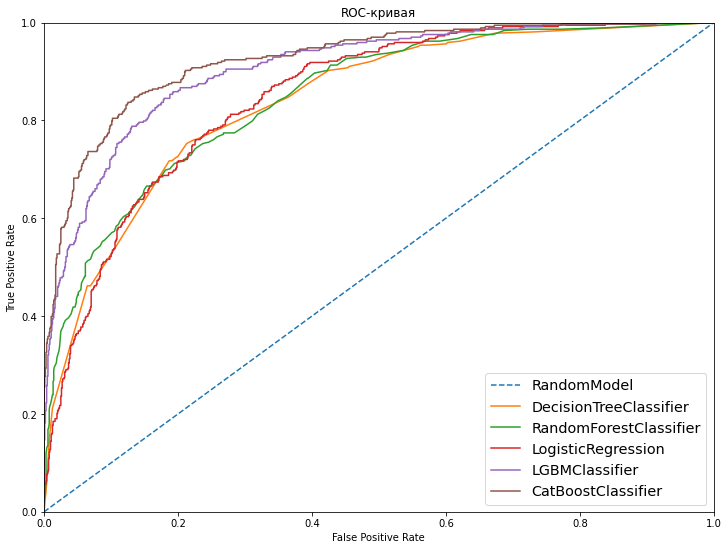

In [122]:
# Для наглядности построю кривую
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = DecisionTreeClassifier(class_weight='balanced',random_state=12345, max_depth=6)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(class_weight='balanced',random_state=12345, n_estimators=130, max_depth=40)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(class_weight='balanced',random_state=12345, C = 1, penalty = 'l2', solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

model = LGBMClassifier(random_state=12345,  num_leaves = 31, learning_rate=0.3,)
model.fit(features_train, target_train)
probabilities_one_valid = model.predict_proba(features_valid)[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LGBMClassifier',auc_roc)
plt.plot(fpr, tpr, label='LGBMClassifier')

model = CatBoostClassifier(random_state=12345, learning_rate=0.05, verbose = False)
model.fit(features_train, target_train)
probabilities_one_valid = model.predict_proba(features_valid)[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC CatBoostClassifier',auc_roc)
plt.plot(fpr, tpr, label='CatBoostClassifier')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Здорово, что построил ROC-кривые для разных моделей!
    
</div>

### Тестирование модели

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера (v2):</b> Ты все-таки остановился на модели логистической регрессии?
    

</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента 2:</b> Да, так как CatBoostRegressor не работает.
    
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера (v3):</b> Странно, у меня все заработало локально.
    
Только сейчас заметил, у нас задача классификации и нужно использовать  CatBoostClassifier. Также и другие соответствующие модели, поправь пожалуйста.
    
</div>

<div class="alert alert-danger">
<b>🚫 Комментарий ревьювера:</b> При тестировании мы считаем метрику roc_auc.
    
Обрати внимание, когда будешь делать предсказания на тестовой выборке. По умолчанию модели считают принадлежность к классу, а для roc-auc нужны вероятности.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента:</b> Учел
    
</div>

In [120]:
#Провожу тестирование на лучших гиперпараметрах

model = CatBoostClassifier(random_state=12345, learning_rate=0.05, verbose = False) 
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
predicted_test = model.predict(features_test)

probabilities_one_valid = model.predict_proba(features_valid)[:,1]
probabilities_one_test = model.predict_proba(features_test)[:,1]


line()
print('Валидационная выборка f1_score = ', f1_score(target_valid, predicted_valid))
print('Тестовая выборка f1_score = ', f1_score(target_test, predicted_test))

line()
print('Валидационная выборка Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Тестовая выборка Точность попадания по классам', accuracy_score(target_test, predicted_test))

line()
print('Валидационная выборка Precision', precision_score(target_valid, predicted_valid))
print('Тестовая выборка Precision', precision_score(target_test, predicted_test))

line()
print('Валидационная выборка Recall', recall_score(target_valid, predicted_valid))
print('Тестовая выборка Recall', recall_score(target_test, predicted_test))

line()
print('Валидационная выборка roc_auc_score =', roc_auc_score(target_valid,probabilities_one_valid )) 
print('Тестовая выборка roc_auc_score =', roc_auc_score(target_test, probabilities_one_test))


______________________________________________
Валидационная выборка f1_score =  0.7514792899408284
Тестовая выборка f1_score =  0.6906906906906907
______________________________________________
Валидационная выборка Точность попадания по классам 0.8805120910384068
Тестовая выборка Точность попадания по классам 0.853589196872779
______________________________________________
Валидационная выборка Precision 0.8246753246753247
Тестовая выборка Precision 0.8013937282229965
______________________________________________
Валидационная выборка Recall 0.6902173913043478
Тестовая выборка Recall 0.6068601583113457
______________________________________________
Валидационная выборка roc_auc_score = 0.9246617659378403
Тестовая выборка roc_auc_score = 0.905029875876513


<div class="alert alert-success">
<b>✔️ Комментарий студента:</b> Вроде бы все исправил, но все равно не получается высокая roc_auc_score и f1_score совсем маленькая.  Подскажи, пожалуйста, что исправить? также не могу понять почему модель CatBoostRegressor выдает ошибку на probabilities_test = model.predict_proba(features_test)?
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v2):</b> Есть подозрение, что модели выдают ошибку из-за неправильного кодирования категориальных признаков.
    
Скорее всего низкое значение метрики из-за неправильного OHE-кодирования. 
    
Нужно признак TotalCharges перевести в числовой тип, чтобы он не был закодирован.
    
Желательно проверить пропуски в признаке TotalCharges.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента 2:</b> Все исправил но метрика так и не подросла(. Не знаю что с этим делать
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v3):</b> Можно попробовать оставить больше признаков, которые ты удалил. Еще считать срок жизни абонента не в месяцах а днях.
    
CatBoostRegressor, LGBMRegressor нужно заменить на Classifier.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий студента 3:</b> Ура ура ура))) Все получилось!!! 
    Перевел срок жизни клиента в дни и Regressor заменил на Classifier. Огромное спасибо за подсказки.
    Кстати говоря сам по себе срок жизни клиента в днях дал небольшой прирост почти по всем моделям. Объясни, пожалуйста, по чему так произошло? Ведь по сути изменился только порядок цифр соотнощение то осталось прежним.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v4):</b> Тебе удалось справиться с выпускным проектом, поздравляю! Данные из разных таблиц собраны в один датафрейм, удалены аномалии, заполнены пропуски, получены новые признаки, а ненужные признаки удалены. Рассмотрено несколько моделей и сделан перебор параметров. Могу отметить самостоятельность и аналитический подход в выполнении проекта! 
    
Значение метрики ROC-AUC > 0.88, это значит что по работе максимальный балл =) Поздравляю!
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v4):</b> Так получилось, потому что измерение в днях более точное, чем в месяцах или годах.
    
Например, клиент мог пользоваться 5 дней и уйти, а мог 30 дней. И все это условно 1 месяц, хотя разница большая. Вполне возможно, что это влияет.
    
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v4):</b> Проект принят, итоговая оценка 6 sp.
    
Андрей, на этом мы прощаемся. Было приятно поработать с тобой над финальным проектом 👍
    
Желаю удачи в дальнейшем пути Data Scientist'а!
</div>

### Общий вывод

1. Для проекта предоставленно 4 датасета дубликатов и пропусков нет.

- 2 таблицы имеют 7043 строки это таблицы с данными о контракте и персональными данными клиентов.
- 2 содержат информацию о том какими услугами пользуются клиенты компании. эти таблицы содержат меньшее количество строк. соответственно можно сделать вывод не все клиенты приобрели и услуги телефонии и услуги интернет.
- Для проведения анализа  объеденил все таблицы в один датасет.

2. Сравнение распределения величин ежемесячных платежей показало, что у ушедших пользователей показатели среднего, минимального и максимальнго значения а также медиана и величины 25%- и 75%-квартилей намного ВЫШЕ чем у действующих пользователей.

- Например:

- среднее 74 к 61
- медиана 79 к 64
- 25%-квартиль 56 к 25
- 75%-квартиль 94 к 88
- Можно предположить, что клиенты ушли из - за высокой ежемесячной платы. Возможно если бы им были предложены лучшие условия они бы остались

3. Доля использования интернета среди ушедших клиентов равна 93%

- Доля использования телефона среди ушедших клиентов равна 90%

Из чего можно сделать вывод, что используемая услуга не влияет на уход клиентов т.к. значительное большинство клиентов пользовались одновременно обоими услугами.

Так же можно заметить, что доля использования интернета среди действующих клиентов равна 30%, что говорит о том что менеджерам компании есть к чему стремиться

4. Анализируя Гистограмму распределения по методу платежа можно сделать вывод, что среди клиентов используюших электронный метов оплаты большая часть ушедших клиентов. Возможно у компании не удобный интерфейс оплаты и над ним нужно поработать. Возможно клиенты не оплачивают услуги заранее, а например как я вспоминаю об оплате когда интернет отключился и соответственно если нет интернета я не могу провести онлайн платеж и это реально раздражает(так с горяча я поменял не одного провайдера). В таком случае компании стоит расмотреть инструмент информирования клиентов о сроке очередного платежа за условные 3-5 дней. Или предусмотреть техническую возможность для проведения платежа при отключенной услуге.

- Гистограмма распределения по гендерному признаку показала, что пол клиента ни как не влияет на отток.

- Гистограмма распределения по семейному положению показала, что при наличие партнера клиенты реже уходят чем холостые.

- Гистограмма распределения по наличию еждевенцев показала, что при отсутствии еждевенца клиенты чаще покидают компанию.

- Гистограмма распределения по типу платежа показала, что 90% доля ушедших клиентов приходится на ежемесячный тип платежа. Тут сотрудникам компании нужно серьезно задуматься как угодоворить клиентов перейти на более длительные подписки. Возможно компании необходимо продумать программу предоставления скидок с целью мотивации клиентов для приобретения долгосрочных подписок. 
5. Для выбора наилучшей модели было проверено несколько моделей. 
- Модель CatBoostClassifier показала лучший результат.
- Модель LGBMClassifier так же проявила себя не плохо
6. Тестирование решил провести на модели CatBoostClassifier.  на тестовой выборке удалось достичь roc_auc_score = 0.9.

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера (v4):</b> Вот небольшие статьи по метрикам в машинном обучении, может пригодиться на будущее:

https://habr.com/ru/company/ods/blog/328372/ 
    
https://habr.com/ru/company/jetinfosystems/blog/420261/

</div>

<font color=blue>
<b> ✔️ 👍Заключение ревьювера:</b> Андрей, было приятно проверять твою работу, она выполнена на хорошем уровне и практически завершена! 
    
Положительные моменты: 
    
- грамотное и понятное оформление кода;
    
- аналитический подход — при удалении признаков и формировании новых написано соответствующее обоснование;
    
- рассмотрено несколько моделей для обучения, сделан перебор гиперпараметров, использован GridSearchCV.
    
Сейчас по проекту есть несколько важных замечаний, которые не трудно поправить. Кроме того, ты быстро подготовил проект, поэтому у нас есть запас по времени, чтобы его улучшить — можешь поработать над рекомендациями, чтобы улучшить проект и получить максимальную оценку =)

Будет также интересно также посчитать метрику accuracy.

Из основных рекомендаций: 

- удалить столбец id из датасета, переделать кодирование ohe;
    
- сгенерировать признак срок жизни клиента, удалить факторы даты/времени.
    
- пересчитать результат, проверить что модели не переобучились. Если метрика ROC-AUC получилась высокая на валидации а на тесте сильно упала, значит модель переобучилась.
 
- на тестовой выборке посчитать roc-auc метрику;
    
- добавить важность признаков хотя бы для одной модели (feature_importances_).
            
На будущее стоит иметь ввиду, что метрика ROC-AUC является не единственной, всегда нужно прислушиваться к требованиями бизнеса. Обычно одной метрикой не ограничиваются, смотрят также Precision, Recall, и выбирают те, которые наиболее подходят для конкретных задач.
    
Также нужно смотреть на важность признаков в модели, чтобы понимать, а какие параметры влияют на отток? Может быть нужно подключить клиентам интернет со скидкой ?)
    
Проверка важности признаков по модели это только один из способов (корреляция в том числе). Используют также методы проверки гипотез.
    
Если есть какие-то трудности, или нужны пояснения по проекту — смело пиши! Я постараюсь тебе помочь 😊

Жду твоего ответа!
    
</font>